**Context**

Welcome. This is a Women’s Clothing E-Commerce dataset revolving around the reviews written by customers. Its nine supportive features offer a great environment to parse out the text through its multiple dimensions. Because this is real commercial data, it has been anonymized, and references to the company in the review text and body have been replaced with “retailer”.

**Content**

This dataset includes 23486 rows and 10 feature variables. Each row corresponds to a customer review, and includes the variables:

Clothing ID: Integer Categorical variable that refers to the specific piece being reviewed.<br>
Age: Positive Integer variable of the reviewers age.<br>
Title: String variable for the title of the review.<br>
Review Text: String variable for the review body.<br>
Rating: Positive Ordinal Integer variable for the product score granted by the customer from 1 Worst, to 5 Best.<br>
Recommended IND: Binary variable stating where the customer recommends the product where 1 is recommended, 0 is not recommended.<br>
Positive Feedback Count: Positive Integer documenting the number of other customers who found this review positive.<br>
Division Name: Categorical name of the product high level division.<br>
Department Name: Categorical name of the product department name.<br>
Class Name: Categorical name of the product class name.<br>

In [1]:
# Connexion
import mysql.connector
import sys

import json 
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import string
from nltk import *
# import nltk
# nltk.download('wordnet')
# nltk.download('averaged_perceptron_tagger') #pour pos_tag
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.tag import pos_tag
from nltk.corpus import wordnet

from nltk.probability import FreqDist
from wordcloud import WordCloud

from tensorflow.keras.preprocessing.text import Tokenizer

In [2]:
def readcsv_to_dataframe(path):
    csv = pd.read_csv(path, sep=',')
    df = pd.DataFrame(csv)
    return df
    
df_ori = readcsv_to_dataframe("./datasets/Womens Clothing E-Commerce Reviews.csv")

In [3]:
# pd.set_option('display.max_rows', 100)

In [4]:
df_ori

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses
...,...,...,...,...,...,...,...,...,...,...,...
23481,23481,1104,34,Great dress for many occasions,I was very happy to snag this dress at such a ...,5,1,0,General Petite,Dresses,Dresses
23482,23482,862,48,Wish it was made of cotton,"It reminds me of maternity clothes. soft, stre...",3,1,0,General Petite,Tops,Knits
23483,23483,1104,31,"Cute, but see through","This fit well, but the top was very see throug...",3,0,1,General Petite,Dresses,Dresses
23484,23484,1084,28,"Very cute dress, perfect for summer parties an...",I bought this dress for a wedding i have this ...,3,1,2,General,Dresses,Dresses


In [5]:
#Valeurs manquantes
df_ori.isna().sum()

Unnamed: 0                    0
Clothing ID                   0
Age                           0
Title                      3810
Review Text                 845
Rating                        0
Recommended IND               0
Positive Feedback Count       0
Division Name                14
Department Name              14
Class Name                   14
dtype: int64

In [3]:
#Suppression de 845 données car il nous faut absolument TOUTES les Review Text
#Suppression de la colonne Unnamed: 0
df_ori.drop('Unnamed: 0', axis=1, inplace=True)
df_ori.dropna(subset=['Review Text'], inplace=True)
df_ori.isna().sum()

Clothing ID                   0
Age                           0
Title                      2966
Review Text                   0
Rating                        0
Recommended IND               0
Positive Feedback Count       0
Division Name                13
Department Name              13
Class Name                   13
dtype: int64

In [4]:
df = df_ori[["Review Text","Recommended IND"]]

# Tokenizer

**from tensorflow.keras.preprocessing.text import Tokenizer**

This class allows to vectorize a text corpus, by turning each text into either a sequence of integers (each integer being the index of a token in a dictionary) or into a vector where the coefficient for each token could be binary, based on word count, based on tf-idf...

By default, all punctuation is removed, turning the texts into space-separated sequences of words (words maybe include the ' character). These sequences are then split into lists of tokens. They will then be indexed or vectorized.

In [8]:
# # Tokenizer les data
# tokenizer = Tokenizer(num_words=2000)

# tokenizer.fit_on_texts(df["inputs"])
# train = tokenizer.texts_to_sequences(df["inputs"])
# tokens = tokenizer.texts_to_sequences(df["inputs"])
# # Updates internal vocabulary based on a list of texts.
# # In the case where texts contains lists, we assume each entry of the lists to be a token.
# # Required before using texts_to_sequences or texts_to_matrix.

In [9]:
df["Lowcase_nopunc"] = df['Review Text'].apply(lambda wrd:[ltrs.lower() for ltrs in wrd if ltrs not in string.punctuation]) 
#la lettre est conservée en lowercase si ce n'est pas un caractère de ponctuation de string.ponctuation
df["Lowcase_nopunc"] = df["Lowcase_nopunc"].apply(lambda wrd:"".join(wrd))
#joint tous les caractères de la phrase

<ipython-input-9-18b685a6c40e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Lowcase_nopunc"] = df['Review Text'].apply(lambda wrd:[ltrs.lower() for ltrs in wrd if ltrs not in string.punctuation])
<ipython-input-9-18b685a6c40e>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Lowcase_nopunc"] = df["Lowcase_nopunc"].apply(lambda wrd:"".join(wrd))


In [10]:
df['Tokenized'] = df['Lowcase_nopunc'].apply(word_tokenize)

<ipython-input-10-129bf708982a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Tokenized'] = df['Lowcase_nopunc'].apply(word_tokenize)


# Stop_words

In [11]:
stop_words = set(stopwords.words('english'))
df['Stopwords_removed'] = df['Tokenized'].apply(lambda x: [word for word in x if word not in stop_words])

<ipython-input-11-012e700824c4>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Stopwords_removed'] = df['Tokenized'].apply(lambda x: [word for word in x if word not in stop_words])


# Lemmatizer

**Lemmatiser** should map gone, going and went into go.

On the other side, the words study, studies and studying **stems** into studi, which is not an English word

from nltk.stem import PorterStemmer, WordNetLemmatizer
 
stemmer = PorterStemmer()<br>
lemmatiser = WordNetLemmatizer()<br>
 
print("Stem %s: %s" % ("studying", stemmer.stem("studying")))<br>
print("Lemmatise %s: %s" % ("studying", lemmatiser.lemmatize("studying")))<br>
print("Lemmatise %s: %s" % ("studying", lemmatiser.lemmatize("studying", pos="v")))<br>


Stem studying: studi<br>
Lemmatise studying: studying<br>
Lemmatise studying: study

In [12]:
df['Pos_tags'] = df['Stopwords_removed'].apply(pos_tag)


<ipython-input-12-8848c798805d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Pos_tags'] = df['Stopwords_removed'].apply(pos_tag)


In [13]:
def get_wordnet_pos(tag):
    if tag.startswith('J'):
        return wordnet.ADJ
    elif tag.startswith('V'):
        return wordnet.VERB
    elif tag.startswith('N'):
        return wordnet.NOUN
    elif tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN

#     if tag in ['JJ', 'JJR', 'JJS']:
#         return wn.ADJ
#     elif tag in ['RB', 'RBR', 'RBS']:
#         return wn.ADV
#     elif tag in ['NN', 'NNS', 'NNP', 'NNPS']:
#         return wn.NOUN
#     elif tag in ['VB', 'VBD', 'VBG', 'VBN', 'VBP', 'VBZ']:
#         return wn.VERB
#     return None 

In [14]:
wordnet_pos_tag=[]
wordnet_pos_tag = df['Pos_tags'].apply(lambda x: [(word, get_wordnet_pos(pos_tag)) for (word, pos_tag) in x])

In [84]:
wnl = WordNetLemmatizer()
df['Lemmatized'] = wordnet_pos_tag.apply(lambda x: [wnl.lemmatize(word, tag) for word, tag in x])

<ipython-input-84-12dab8763dfd>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Lemmatized'] = wordnet_pos_tag.apply(lambda x: [wnl.lemmatize(word, tag) for word, tag in x])


In [16]:
df.head()

,Review Text,Recommended IND,Lowcase_nopunc,Tokenized,Stopwords_removed,Pos_tags,lemmatized
0,Absolutely wonderful - silky and sexy and comf...,1,absolutely wonderful silky and sexy and comfo...,"[absolutely, wonderful, silky, and, sexy, and,...","[absolutely, wonderful, silky, sexy, comfortable]","[(absolutely, RB), (wonderful, JJ), (silky, JJ...","[absolutely, wonderful, silky, sexy, comfortable]"
1,Love this dress! it's sooo pretty. i happene...,1,love this dress its sooo pretty i happened t...,"[love, this, dress, its, sooo, pretty, i, happ...","[love, dress, sooo, pretty, happened, find, st...","[(love, VB), (dress, NN), (sooo, NN), (pretty,...","[love, dress, sooo, pretty, happen, find, stor..."
2,I had such high hopes for this dress and reall...,0,i had such high hopes for this dress and reall...,"[i, had, such, high, hopes, for, this, dress, ...","[high, hopes, dress, really, wanted, work, ini...","[(high, JJ), (hopes, NNS), (dress, VBP), (real...","[high, hope, dress, really, wanted, work, init..."
3,"I love, love, love this jumpsuit. it's fun, fl...",1,i love love love this jumpsuit its fun flirty ...,"[i, love, love, love, this, jumpsuit, its, fun...","[love, love, love, jumpsuit, fun, flirty, fabu...","[(love, VB), (love, NN), (love, NN), (jumpsuit...","[love, love, love, jumpsuit, fun, flirty, fabu..."
4,This shirt is very flattering to all due to th...,1,this shirt is very flattering to all due to th...,"[this, shirt, is, very, flattering, to, all, d...","[shirt, flattering, due, adjustable, front, ti...","[(shirt, NN), (flattering, VBG), (due, JJ), (a...","[shirt, flatter, due, adjustable, front, tie, ..."


In [19]:
words = df['Lemmatized']
allwords = []
for wordlist in words:
    allwords += wordlist
# print(allwords)

In [48]:
poscom = df[df['Recommended IND']==1]['Lemmatized']
poswords = []
for wordlist in poscom:
    poswords += wordlist

In [26]:
negcom = df[df['Recommended IND']==0]['Lemmatized']
negwords = []
for wordlist in negcom:
    negwords += wordlist

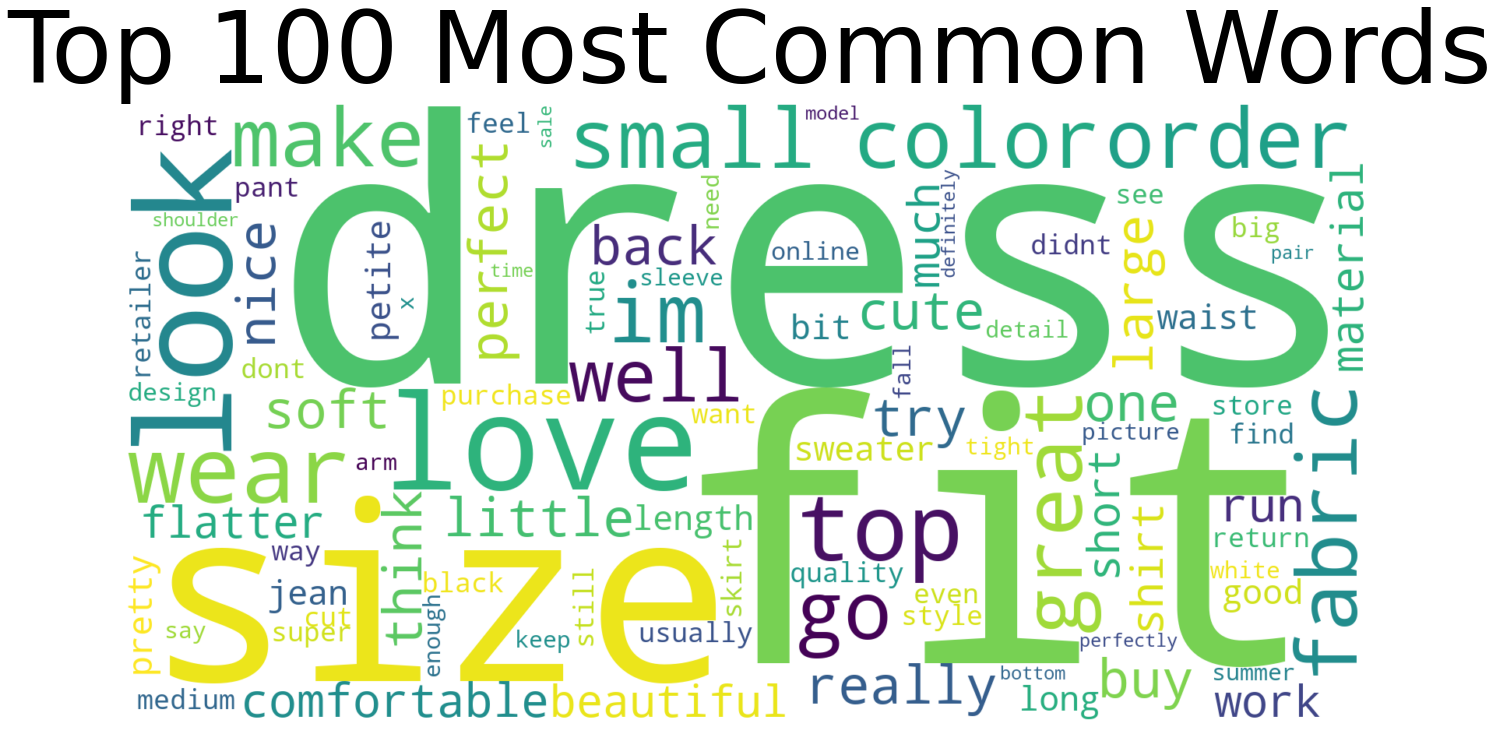

In [54]:
mostcommon = FreqDist(allwords).most_common(100)
wordcloud = WordCloud(width=1600, height=800, background_color='white').generate(str(mostcommon).replace("'", ''))
fig = plt.figure(figsize=(30,10), facecolor='white')
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title('Top 100 Most Common Words', fontsize=100)
plt.tight_layout(pad=0)
plt.show()

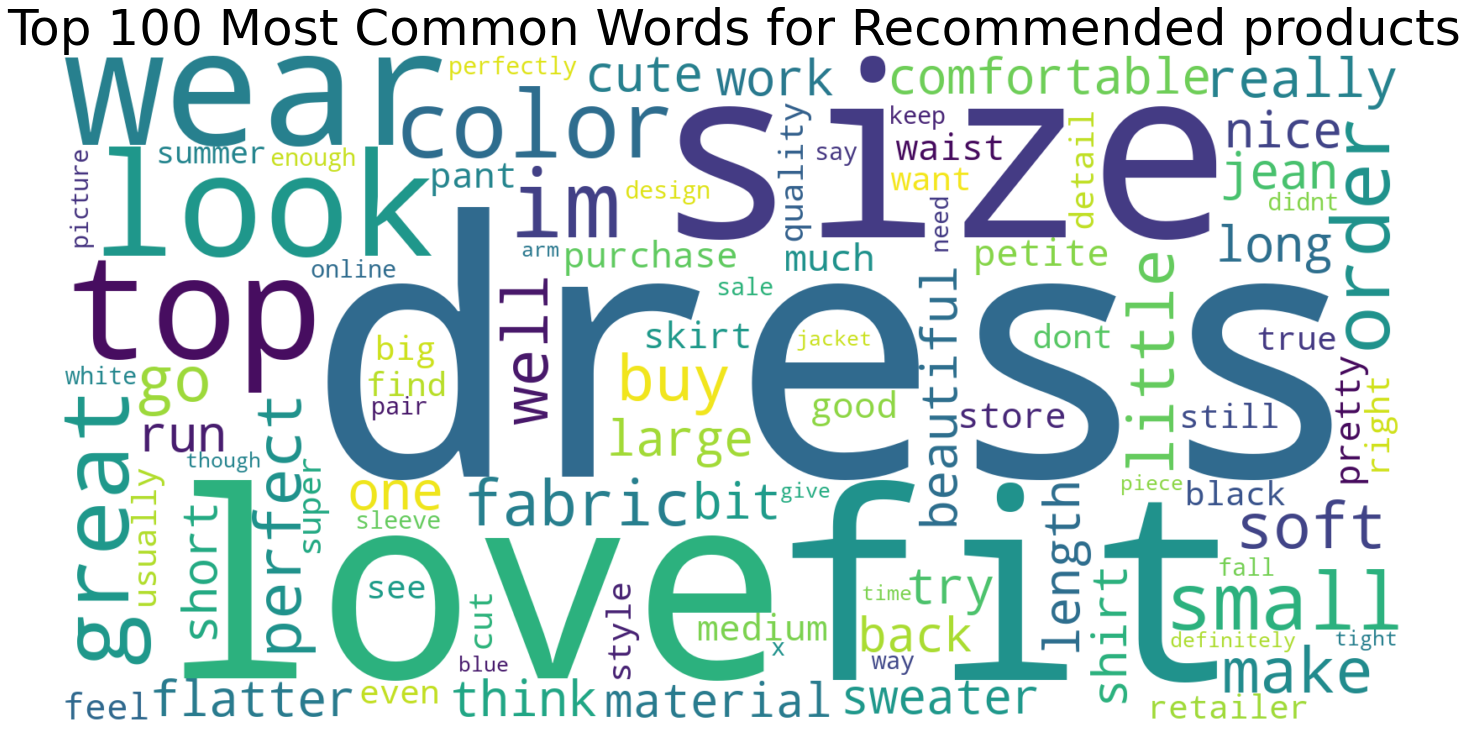

In [55]:
mostcommon = FreqDist(poswords).most_common(100)
wordcloud = WordCloud(width=1600, height=800, background_color='white').generate(str(mostcommon).replace("'", ''))
fig = plt.figure(figsize=(30,10), facecolor='white')
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title('Top 100 Most Common Words for Recommended products', fontsize=50)
plt.tight_layout(pad=0)
plt.show()

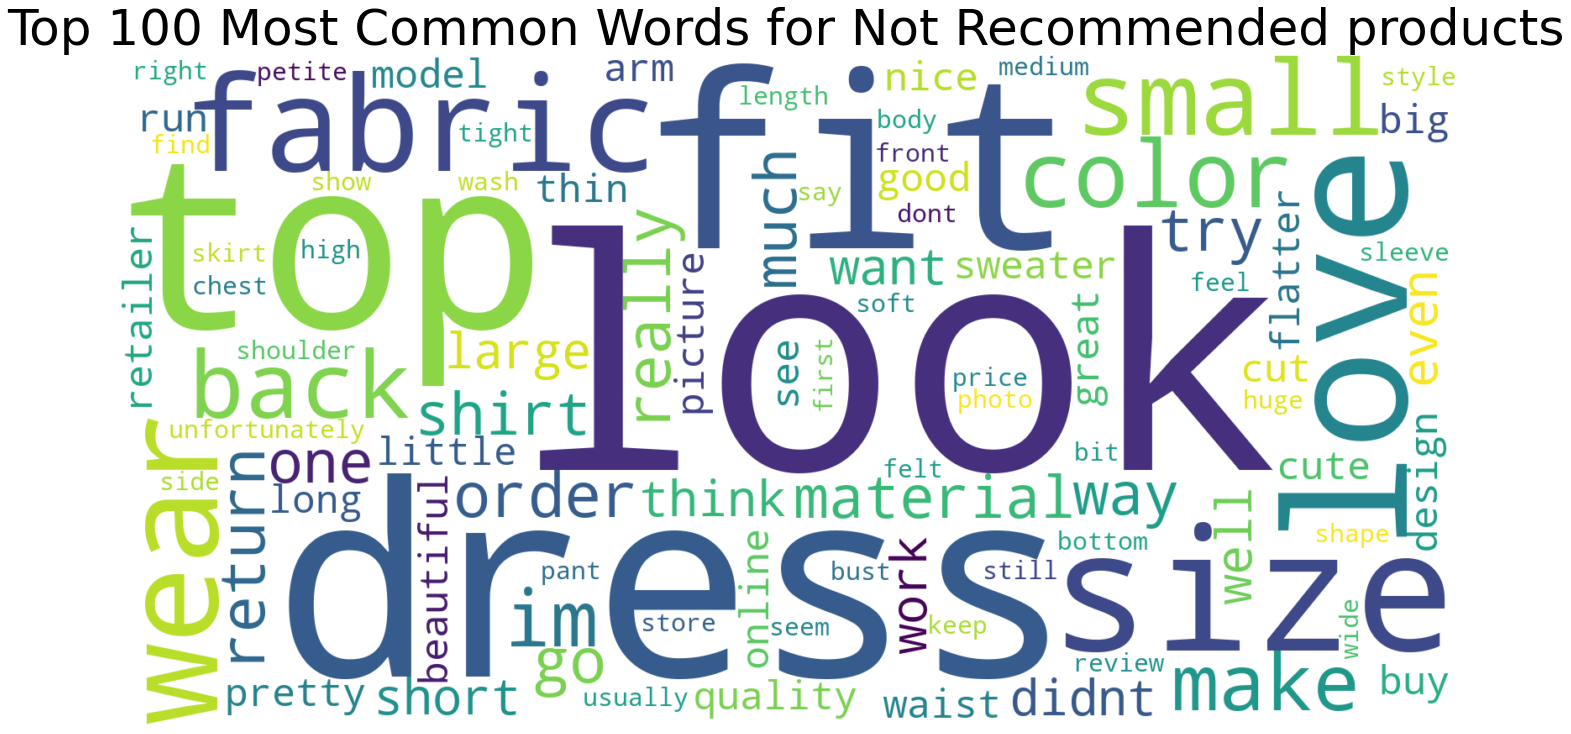

In [56]:
mostcommon = FreqDist(negwords).most_common(100)
wordcloud = WordCloud(width=1600, height=800, background_color='white').generate(str(mostcommon).replace("'", ''))
fig = plt.figure(figsize=(30,10), facecolor='white')
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title('Top 100 Most Common Words for Not Recommended products', fontsize=50)
plt.tight_layout(pad=0)
plt.show()

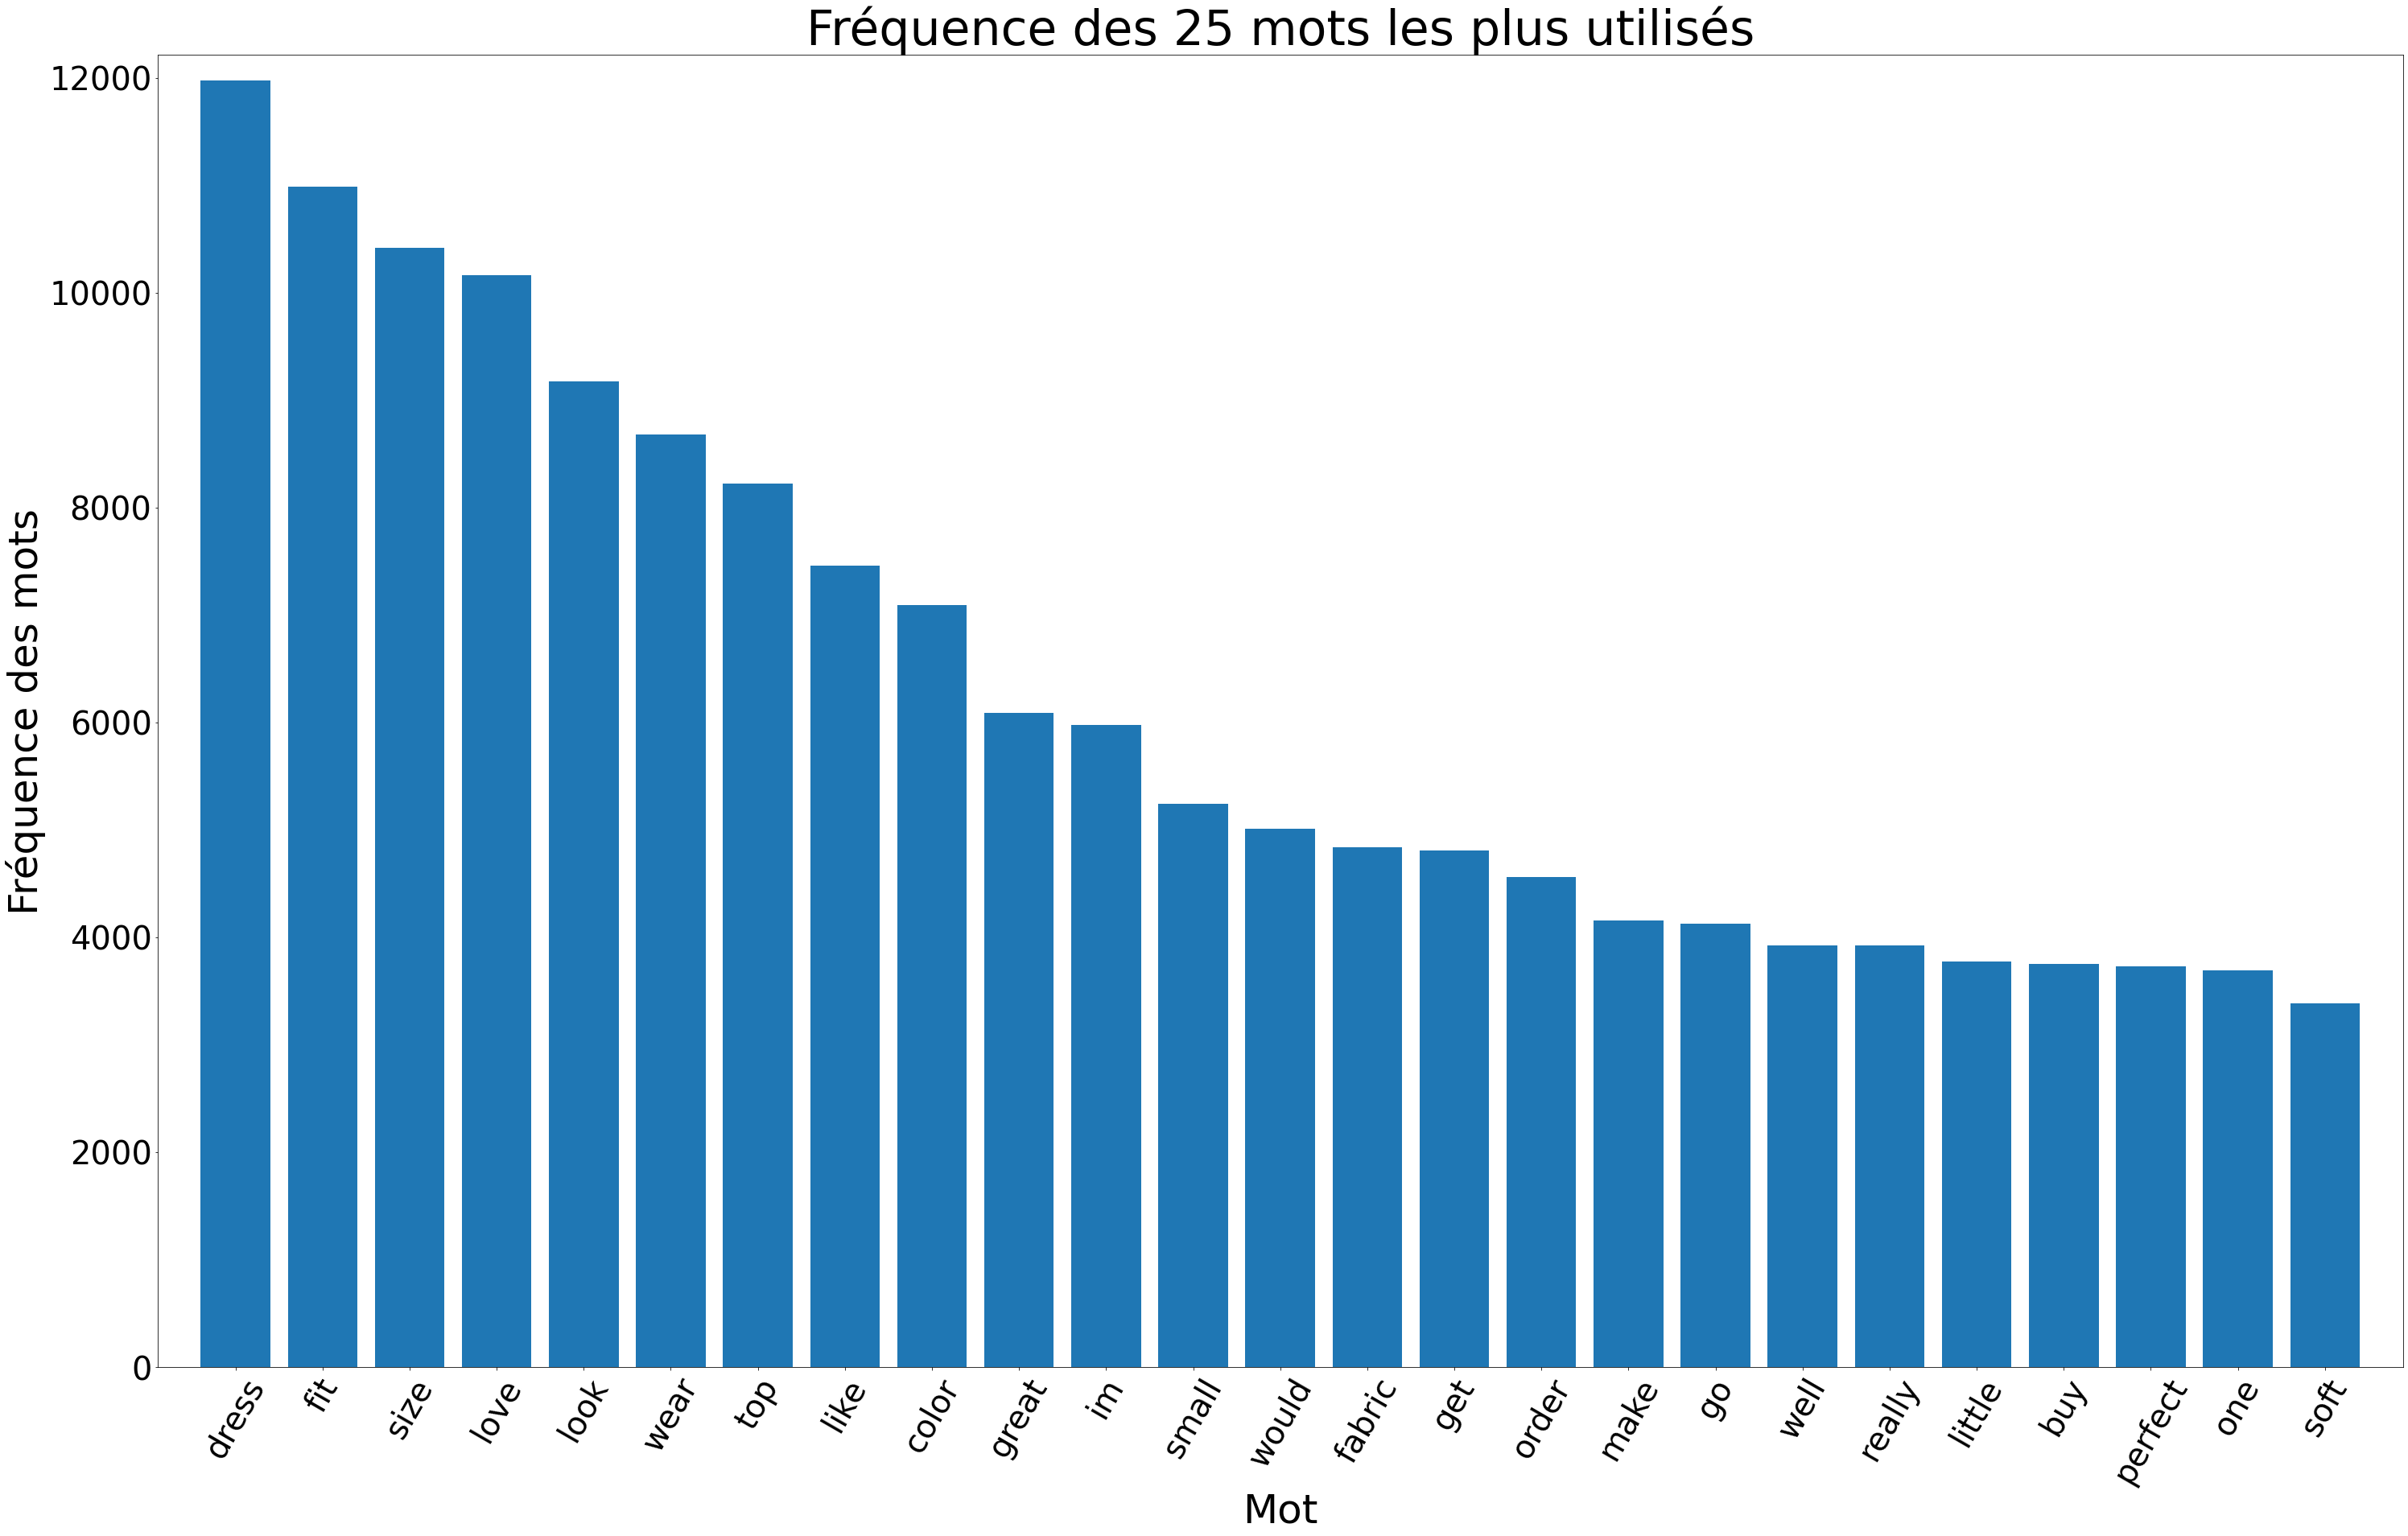

In [58]:
mostcommon_small = FreqDist(allwords).most_common(25)
x, y = zip(*mostcommon_small)
plt.figure(figsize=(50,30))
plt.margins(0.02)
plt.bar(x, y)
plt.xlabel('Mot', fontsize=50)
plt.ylabel('Fréquence des mots', fontsize=50)
plt.yticks(fontsize=40)
plt.xticks(rotation=60, fontsize=40)
plt.title('Fréquence des 25 mots les plus utilisés', fontsize=60)
plt.show()

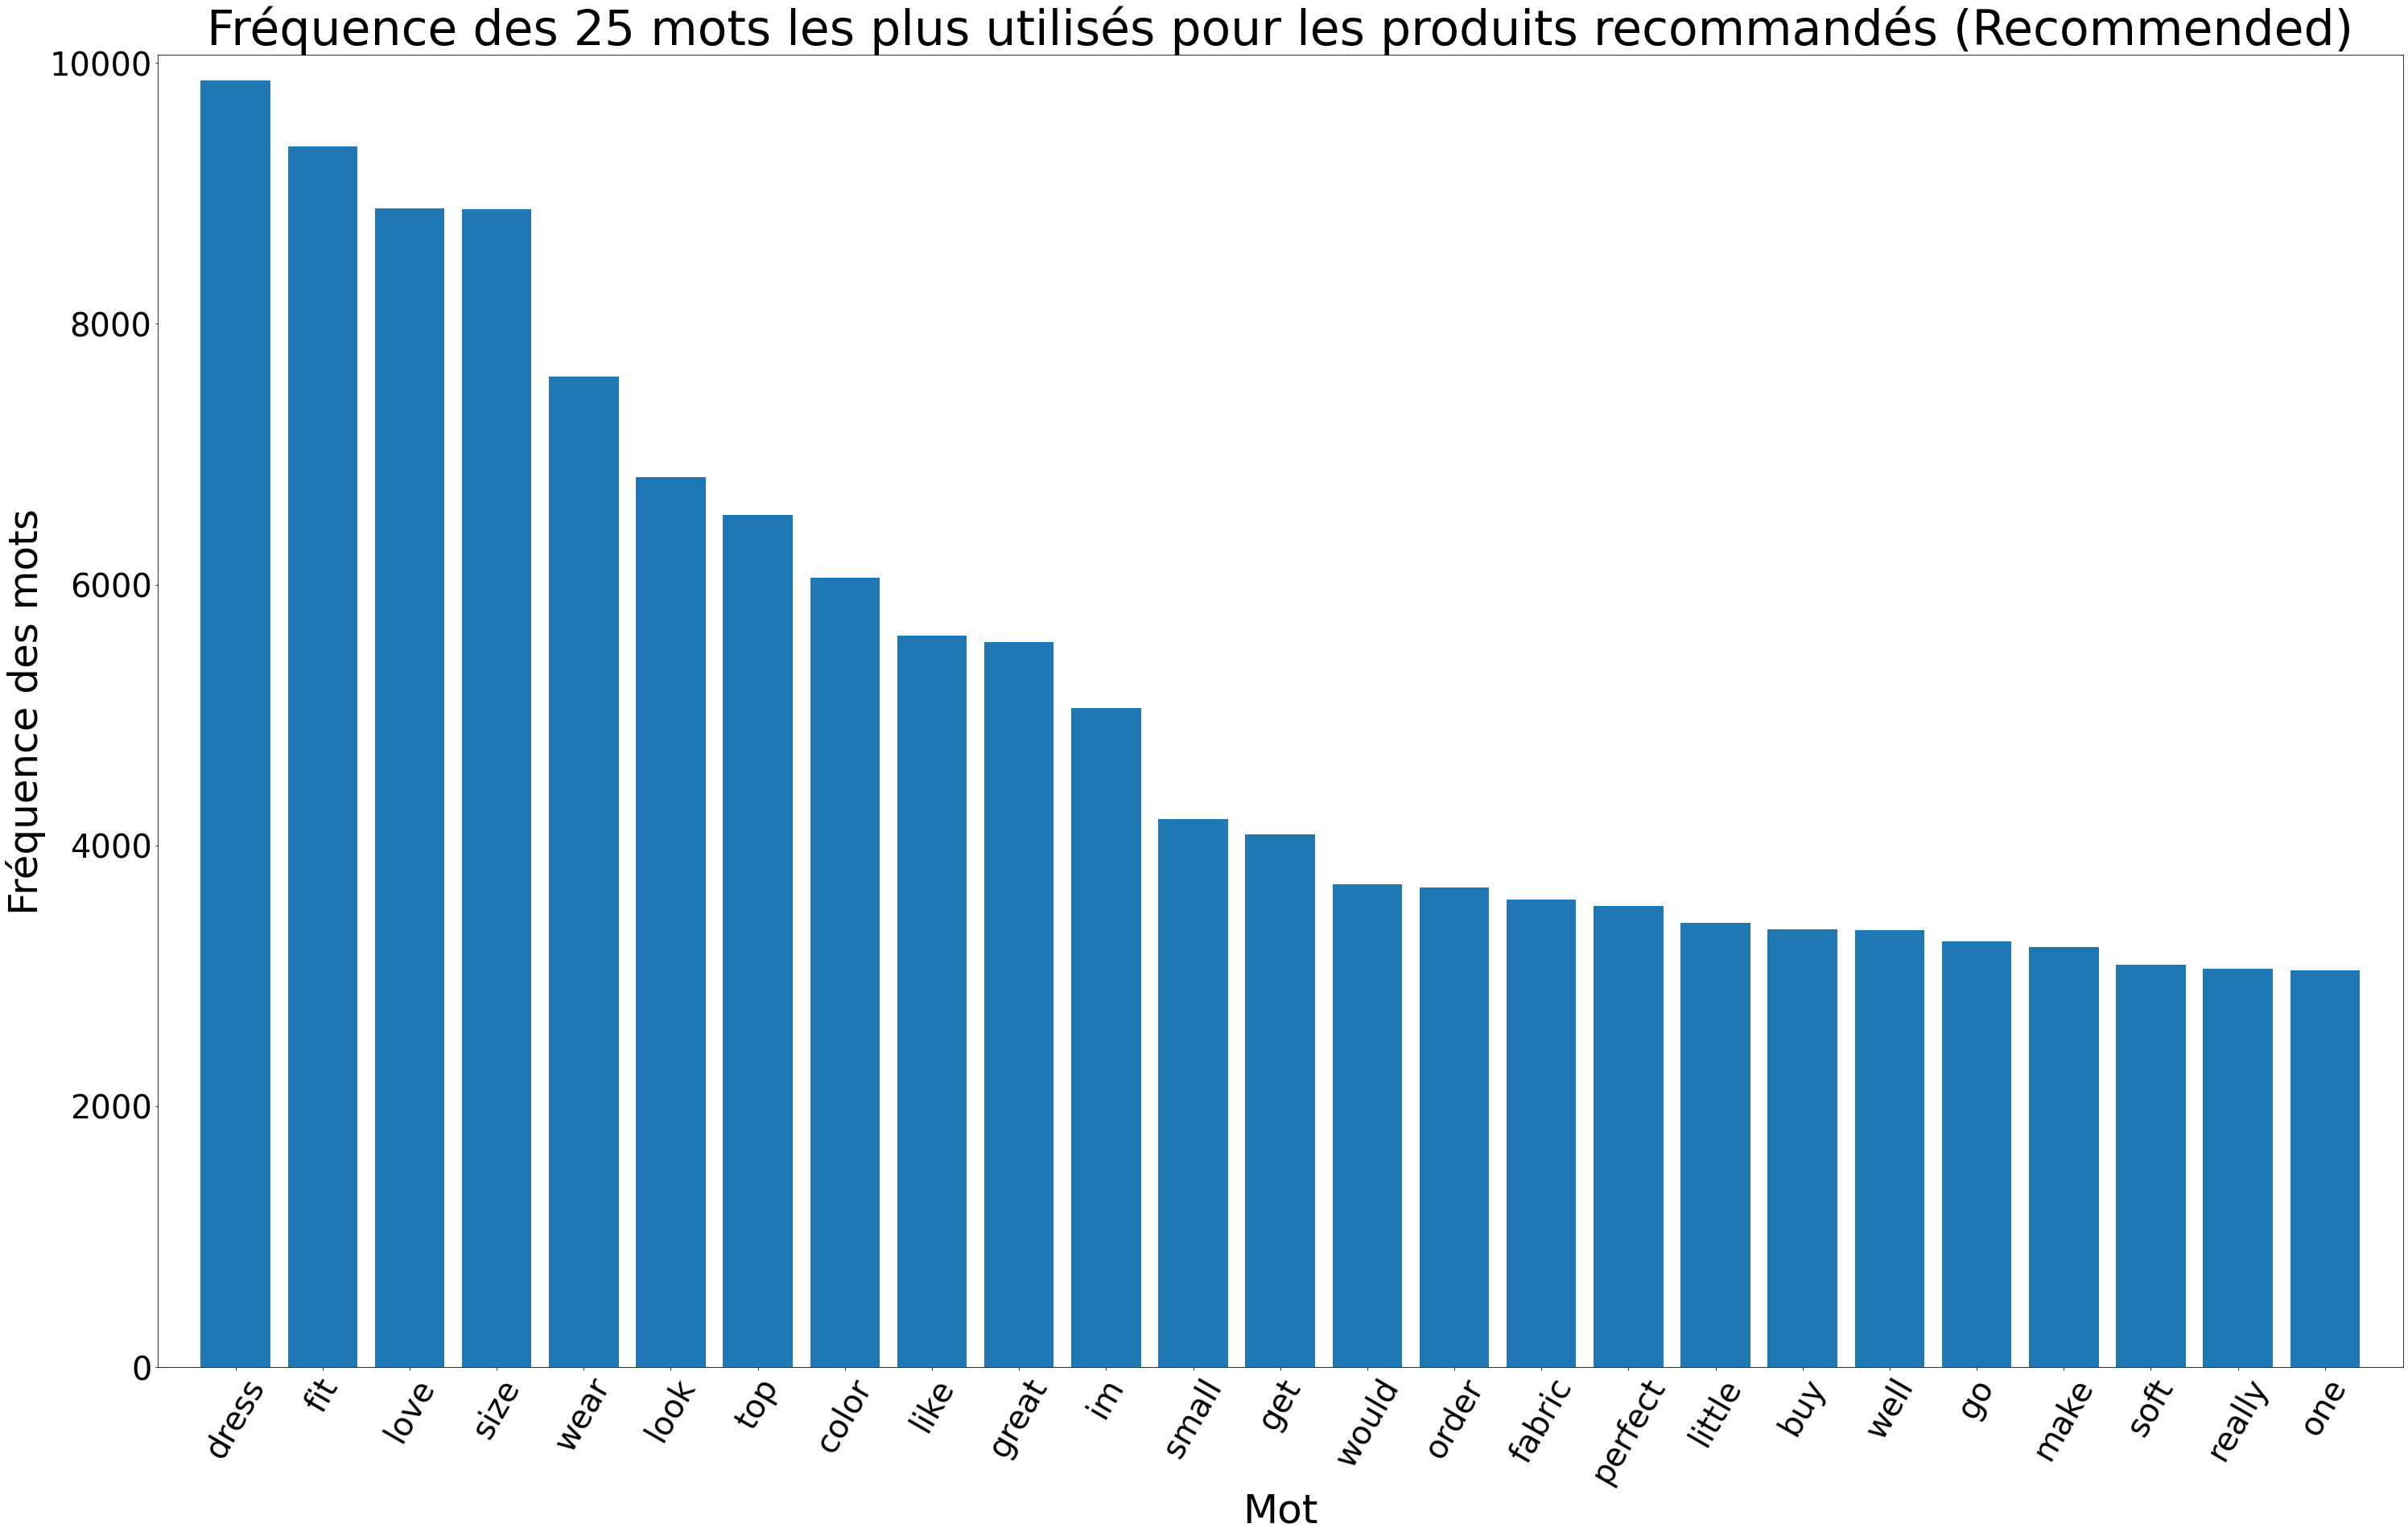

In [61]:
mostcommon_small = FreqDist(poswords).most_common(25)
x, y = zip(*mostcommon_small)
plt.figure(figsize=(50,30))
plt.margins(0.02)
plt.bar(x, y)
plt.xlabel('Mot', fontsize=50)
plt.ylabel('Fréquence des mots', fontsize=50)
plt.yticks(fontsize=40)
plt.xticks(rotation=60, fontsize=40)
plt.title('Fréquence des 25 mots les plus utilisés pour les produits recommandés (Recommended)', fontsize=60)
plt.show()

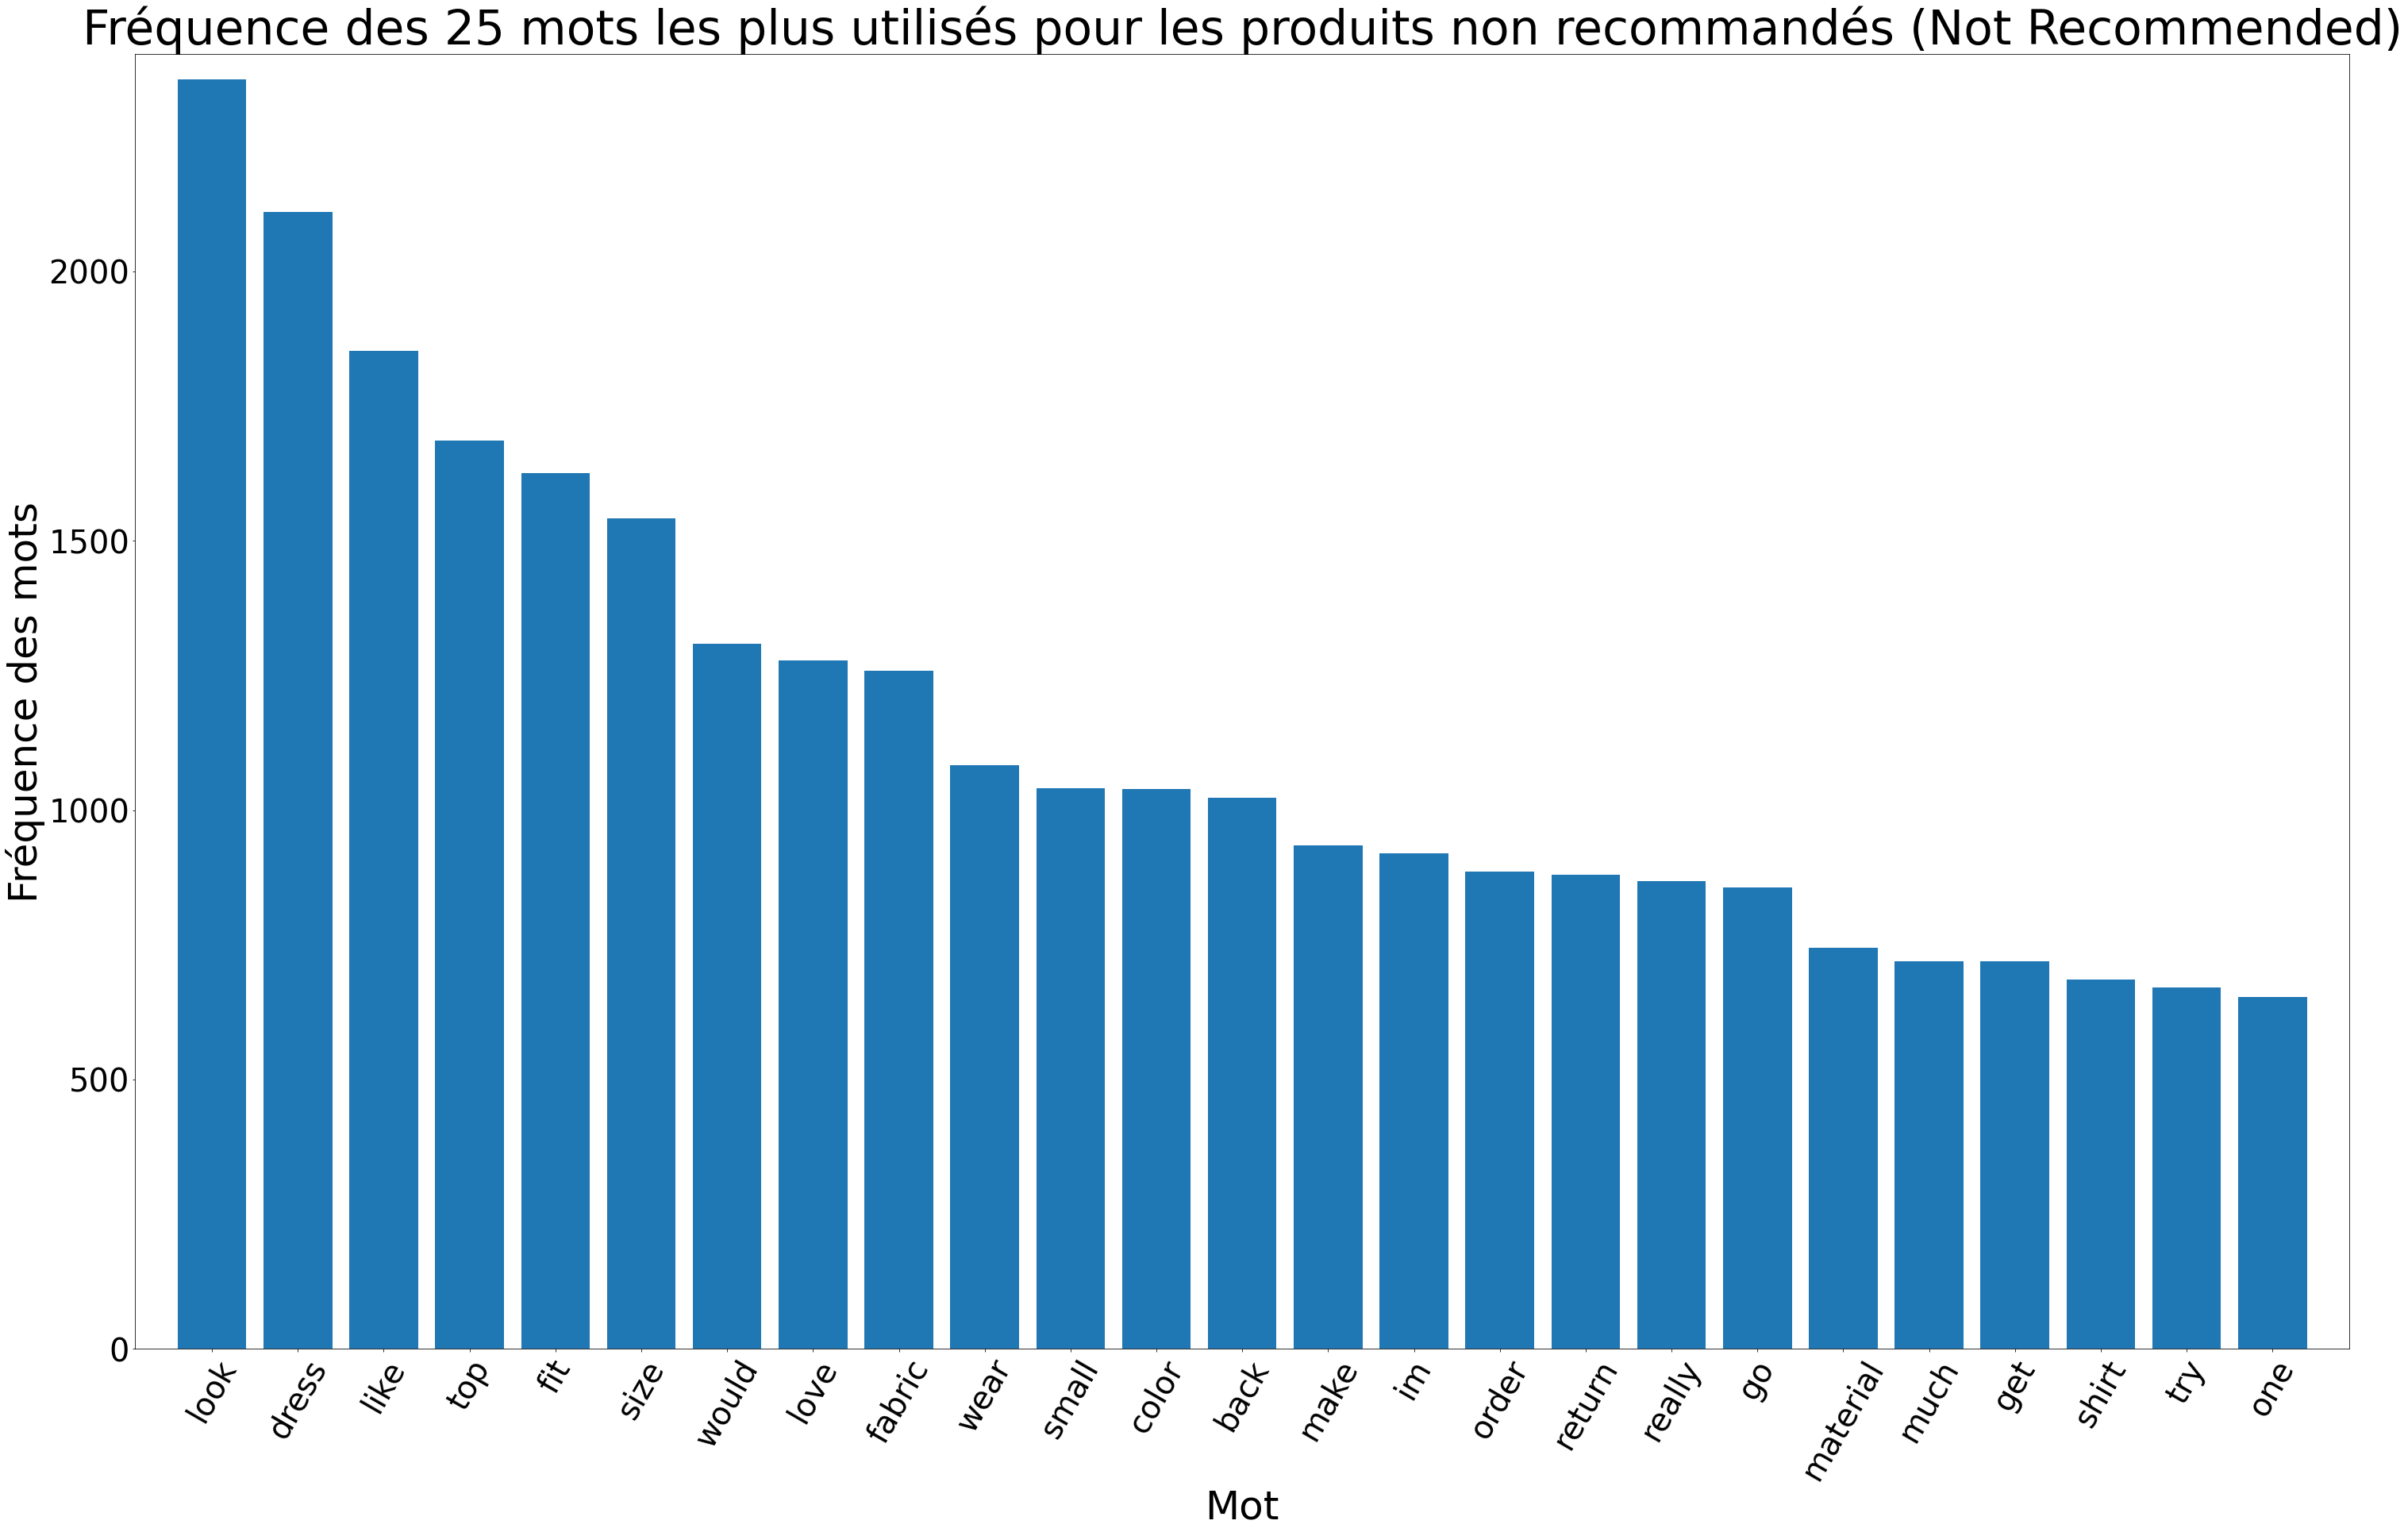

In [60]:
mostcommon_small = FreqDist(negwords).most_common(25)
x, y = zip(*mostcommon_small)
plt.figure(figsize=(50,30))
plt.margins(0.02)
plt.bar(x, y)
plt.xlabel('Mot', fontsize=50)
plt.ylabel('Fréquence des mots', fontsize=50)
plt.yticks(fontsize=40)
plt.xticks(rotation=60, fontsize=40)
plt.title('Fréquence des 25 mots les plus utilisés pour les produits non recommandés (Not Recommended)', fontsize=60)
plt.show()

In [310]:
def statistical_count_features(sentiment,analyse):
    table = df[df['Recommended IND']==sentiment]
    word_count = []
    char_count = []
    word_density = []
    for line in range(len(table)):
        word_count.append(len(table.iloc[line][analyse]))
        char_count.append(len((' '.join(table.iloc[line][analyse])).replace(' ','')))
        word_density.append(word_count[-1] / (char_count[-1])) #ou (char_count[-1] + 1)
    #Dataframe pour chacun des Statistical Count Features
    word_count_df = pd.DataFrame(word_count).describe()
    char_count_df = pd.DataFrame(char_count).describe()
    word_density_df = pd.DataFrame(word_density).describe()
    #Construction du dataframe à return
    #Passage de l'index en colonne
    word_count_df = word_count_df.reset_index(level=0)
    char_count_df = char_count_df.reset_index(level=0)
    word_density_df = word_density_df.reset_index(level=0)
    #Merge des 3 dataframes
    merged = pd.merge(pd.merge(word_count_df,char_count_df,on="index"),word_density_df,on="index")
    merged.columns = ['index','word_count', 'char_count','word_density_df']
    #Création du dataframe de la somme pour chacun des Statistical Count Features 
    mergedsum = pd.DataFrame(["sum",sum(word_count),sum(char_count),sum(word_density)]).T
    mergedsum.columns = ['index','word_count', 'char_count','word_density_df']
    #Ajout de la somme par concaténation
    merged = pd.concat([merged,mergedsum])
    #Remise de l'index au propre, au "même niveau")
    merged = merged.set_index('index')
    merged = merged.reset_index()
    return merged

In [311]:
statistical_count_features(1,"Tokenized")

,index,word_count,char_count,word_density_df
0,count,18540.0,18540.0,18540.0
1,mean,59.562999,237.287001,0.249599
2,std,28.739125,112.060432,0.021739
3,min,2.0,8.0,0.12
4,25%,35.0,141.0,0.236842
5,50%,58.0,231.0,0.25
6,75%,88.0,354.0,0.263418
7,max,115.0,409.0,0.346939
8,sum,1104298,4399301,4627.567464


In [314]:
statistical_count_features(0,"Tokenized")

,index,word_count,char_count,word_density_df
0,count,4101.0,4101.0,4101.0
1,mean,61.786637,246.859546,0.250106
2,std,26.922492,106.391551,0.019468
3,min,3.0,17.0,0.142857
4,25%,40.0,158.0,0.238095
5,50%,61.0,244.0,0.25
6,75%,88.0,357.0,0.262599
7,max,115.0,411.0,0.33
8,sum,253387,1012371,1025.684272


In [315]:
statistical_count_features(1,'Stopwords_removed')

,index,word_count,char_count,word_density_df
0,count,18540.0,18540.0,18540.0
1,mean,29.422546,158.258037,0.186327
2,std,13.888411,74.326451,0.017664
3,min,2.0,7.0,0.096774
4,25%,18.0,95.0,0.175115
5,50%,29.0,153.0,0.185782
6,75%,43.0,229.0,0.19697
7,max,63.0,329.0,0.285714
8,sum,545494,2934104,3454.493906


In [316]:
statistical_count_features(0,'Stopwords_removed')

,index,word_count,char_count,word_density_df
0,count,4101.0,4101.0,4101.0
1,mean,29.889051,162.098756,0.185104
2,std,13.028903,70.696574,0.016937
3,min,2.0,10.0,0.103448
4,25%,19.0,103.0,0.174419
5,50%,30.0,159.0,0.1841
6,75%,42.0,228.0,0.195122
7,max,59.0,335.0,0.275862
8,sum,122575,664767,759.110091


In [319]:
statistical_count_features(1,'Lemmatized')

,index,word_count,char_count,word_density_df
0,count,18540.0,18540.0,18540.0
1,mean,29.422546,149.823247,0.19671
2,std,13.888411,70.267586,0.01926
3,min,2.0,7.0,0.096774
4,25%,18.0,90.0,0.184502
5,50%,29.0,145.0,0.196172
6,75%,43.0,216.0,0.208333
7,max,63.0,313.0,0.307692
8,sum,545494,2777723,3647.012097


In [318]:
statistical_count_features(0,'Lemmatized')

,index,word_count,char_count,word_density_df
0,count,4101.0,4101.0,4101.0
1,mean,29.889051,152.693977,0.196599
2,std,13.028903,66.710951,0.01839
3,min,2.0,10.0,0.103448
4,25%,19.0,97.0,0.184615
5,50%,30.0,150.0,0.196078
6,75%,42.0,214.0,0.207547
7,max,59.0,318.0,0.293103
8,sum,122575,626198,806.251866


# Punctuation Count

In [5]:
#Punctuation Count
pos_punc_count = df[df['Recommended IND']==1]['Review Text'].apply(lambda x : len([a for a in x if a in string.punctuation]))
neg_punc_count = df[df['Recommended IND']==0]['Review Text'].apply(lambda x : len([a for a in x if a in string.punctuation]))

In [6]:
print(pos_punc_count)
print(neg_punc_count)

0         1
1        13
3         9
4         5
6        22
         ..
23479    16
23481     3
23482    12
23484    12
23485     4
Name: Review Text, Length: 18540, dtype: int64
2        14
5         9
10        5
22       11
25       10
         ..
23449    18
23450    11
23460    17
23478     7
23483     8
Name: Review Text, Length: 4101, dtype: int64


In [8]:
pd.DataFrame(pos_punc_count.describe())

,Review Text
count,18540.000000
mean,10.096656
std,5.873850
min,0.000000
25%,6.000000
50%,9.000000
75%,14.000000
max,60.000000


In [9]:
pd.DataFrame(neg_punc_count.describe())

,Review Text
count,4101.000000
mean,10.118508
std,5.378421
min,0.000000
25%,6.000000
50%,10.000000
75%,14.000000
max,45.000000


# Upper-Case to Lower-Case Words ratio

In [152]:
#Upper-Case to Lower-Case Words ratio (tous les sentiments)
LC_counter = 0
UC_counter = 0
UCLC_ratio = []

for text in enumerate(df['Review Text']):
    textchar = text[1].replace(' ','')
    for char in enumerate(textchar):
        if char[1] in string.punctuation:
            continue
        if char[1] == char[1].lower():
            LC_counter += 1
        else:
            UC_counter += 1
    UCLC_ratio.append(UC_counter/LC_counter)
    LC_counter = 0
    UC_counter = 0

In [155]:
# FONCTION Upper-Case to Lower-Case Words ratio
def calc_UCLC_ratio(sentiment):
    LC_count = 0
    UC_count = 0
    UC_counter = 0
    UCLC_ratio = []
    for text in enumerate(df[df['Recommended IND']==sentiment]['Review Text']):
        textchar = text[1].replace(' ','')
        for char in enumerate(textchar):
            if char[1] in string.punctuation:
                continue
            if char[1] == char[1].lower():
                LC_counter += 1
            else:
                UC_counter += 1
        UCLC_ratio.append(UC_counter/LC_counter)
        LC_counter = 0
        UC_counter = 0
    return UCLC_ratio

In [147]:
#Upper-Case to Lower-Case Words ratio for Not Recommended
calc_UCLC_ratio(0)
#Upper-Case to Lower-Case Words ratio for Recommended
calc_UCLC_ratio(1)

0.004044946045926579
0.00421365248934165


In [143]:
# #Upper-Case to Lower-Case Words ratio (tous les sentiments)
# LC_count = 0
# UC_count = 0
# for text in enumerate(df['Review Text']):
#     textchar = text[1].replace(' ','')
#     for char in enumerate(textchar):
#         if char[1] in string.punctuation:
#             continue
#         if char[1] == char[1].lower():
#             LC_count += 1
#         else:
#             UC_count += 1
# UC_count/LC_count

0.004182091731424146

In [175]:
#Longueur du commentaire selon la recommandation du produit
words=df[df['Recommended IND']==1]['Tokenized']
poswordsT = []
for wordlist in words:
    poswordsT.append(len(wordlist))
pd.DataFrame(poswordsT).describe()

,0
count,18540.000000
mean,59.562999
std,28.739125
min,2.000000
25%,35.000000
50%,58.000000
75%,88.000000
max,115.000000


In [177]:
df[df['Recommended IND']==1]['Tokenized'].iloc[0]

['absolutely', 'wonderful', 'silky', 'and', 'sexy', 'and', 'comfortable']

In [176]:
poswordsT

[7,
 62,
 22,
 36,
 99,
 97,
 34,
 72,
 8,
 91,
 69,
 95,
 94,
 73,
 57,
 33,
 57,
 60,
 105,
 41,
 94,
 47,
 32,
 83,
 17,
 66,
 18,
 52,
 18,
 29,
 69,
 16,
 23,
 26,
 50,
 47,
 96,
 73,
 46,
 39,
 10,
 15,
 47,
 69,
 37,
 9,
 89,
 84,
 41,
 100,
 50,
 57,
 39,
 21,
 12,
 43,
 103,
 95,
 89,
 99,
 51,
 109,
 99,
 59,
 51,
 85,
 102,
 10,
 92,
 97,
 100,
 76,
 105,
 76,
 82,
 81,
 94,
 87,
 47,
 87,
 45,
 54,
 50,
 62,
 62,
 7,
 103,
 88,
 40,
 12,
 36,
 62,
 64,
 24,
 54,
 60,
 37,
 91,
 88,
 87,
 30,
 29,
 103,
 86,
 70,
 51,
 89,
 80,
 76,
 99,
 73,
 45,
 56,
 37,
 101,
 82,
 46,
 84,
 76,
 30,
 22,
 43,
 104,
 41,
 52,
 55,
 90,
 86,
 97,
 40,
 99,
 48,
 30,
 96,
 25,
 36,
 90,
 74,
 61,
 52,
 63,
 46,
 99,
 35,
 86,
 91,
 51,
 32,
 18,
 85,
 40,
 43,
 22,
 25,
 89,
 99,
 66,
 14,
 41,
 54,
 72,
 90,
 23,
 64,
 100,
 47,
 81,
 99,
 25,
 11,
 103,
 34,
 91,
 94,
 61,
 96,
 28,
 66,
 96,
 72,
 88,
 75,
 96,
 43,
 29,
 31,
 89,
 36,
 42,
 70,
 53,
 31,
 54,
 91,
 10,
 78,
 35,
 57,
 

In [174]:
#Longueur du commentaire selon la recommandation du produit
words=df[df['Recommended IND']==0]['Tokenized']
negwordsT = []
for wordlist in words:
    negwordsT.append(len(wordlist))
pd.DataFrame(negwordsT).describe()

,0
count,4101.000000
mean,61.786637
std,26.922492
min,3.000000
25%,40.000000
50%,61.000000
75%,88.000000
max,115.000000


In [85]:
#Longueur du commentaire selon la recommandation du produit
words=df[df['Recommended IND']==1]['Lemmatized']
poswordsT = []
for wordlist in words:
    poswordsT.append(len(wordlist))
pd.DataFrame(poswordsT).describe()

,0
count,18540.000000
mean,29.422546
std,13.888411
min,2.000000
25%,18.000000
50%,29.000000
75%,43.000000
max,63.000000


In [86]:
#Longueur du commentaire selon la recommandation du produit
words=df[df['Recommended IND']==0]['Lemmatized']
poswordsT = []
for wordlist in words:
    poswordsT.append(len(wordlist))
pd.DataFrame(poswordsT).describe()

,0
count,4101.000000
mean,29.889051
std,13.028903
min,2.000000
25%,19.000000
50%,30.000000
75%,42.000000
max,59.000000


1 Statistical Count Features from headline text

**Word Count** - Total number of words in the headline<br>
**Character Count** - Total number of characters in the headline excluding spaces<br>
**Word Density** - Average length of the words used in the headline<br>
**Punctuation Count** - Total number of punctuations used in the headline<br>
**Upper-Case to Lower-Case Words ratio** - ratio of upper case words used and lower case words used in the text<br>

2 Headline Text Features

Sentiment: Polarity - sentiment value of the headline computed using textblob package<br>
Part of Speech: Nouns to Verbs Ratio - ratio of nouns and verbs used in the text<br>